# Bài tập 4


## Câu 1 (1 điểm)

- Theo đề bài, với $N > d_{VC}$ thì $m_\mathcal{H}(N) \approx N^{d_{VC}}$. 
Còn khi $N \leq d_{VC}$ thì  $m_\mathcal{H}(N) = N^{d_{VC}} + 1$ 

- "95% confidence" nghĩa là $1 - \delta = 0.95$ => $\delta = 0.05$; "your generalization error is at most 0.05" nghĩa là $\epsilon = 0.05$.

- Tìm $N$ bằng cách giải phương trình: $\epsilon = \sqrt{\frac{8}{N} ln \frac{4m_\mathcal{H}(2N)}{\delta} } $. (1)

(1) <=> $N = \frac{8}{\epsilon^2}(ln\frac{4((2N)^{d\mathcal{vc}}+1)}{\delta}) $

In [1]:
import numpy as np
# delta = 0.05
# dvc = 10
# epsilon = 0.05
# initial_N=1000 (Giá trị dự đoán N cho vòng đệ quy)

#Dùng đệ quy để tính toán N cho đến khi N - N(dự đoán) < 1:
def get_N(delta = 0.05, dvc = 10, epsilon = 0.05, initial_N=1000):
    N = 8 / epsilon**2 * np.log((4 * ((2 * initial_N) ** dvc + 1) / delta))
    if (N - initial_N) < 1:
        return N
    else:
        return get_N(delta, dvc, epsilon, N)
print("Giới hạn tổng quát của VC: N = {}".format(get_N()))

Giới hạn tổng quát của VC: N = 452956.83215921914


YOUR ANSWER HERE Giá trị của N gần với 460000 nhất. Do đó, em chọn đáp án [d]

## Câu 2 (1 điểm)

Với $N > d_{VC}$ thì ta có thể áp dụng xấp xỉ $m_\mathcal{H}(N) \approx N^{d_{VC}}$ (như đã nêu trong **Câu 1**).

Đối với câu a, b:

In [2]:
import math
N = 10000
dvc = 50
delta = 0.05
epsilon_a = lambda N,dvc,delta: (math.sqrt(8/N * math.log(4 / delta * (2*N)**dvc)))
epsilon_b = lambda N,dvc,delta: (math.sqrt(2/N * math.log(2*N * N**dvc)) + math.sqrt(-2/N * math.log(delta)) + 1/N)

Đối với câu c: 
- Bình phương 2 vế ta được bất phương trình bậc 2 theo $\epsilon$ sau: $\epsilon^2 - \frac{2\epsilon}{N} - \frac{1}{N} ln(\frac{6m_\mathcal{H}(2N)}{\delta}) \leq 0$ 


In [3]:
def epsilon_c(N,dvc,delta):
    #Giải hệ phương trình dạng ax^2 + bx + c = 0 
    a = 1
    b = -2/N
    c = - 1/N *math.log(6 * (2*N)**dvc/delta)
    d = b**2-4*a*c 
    #chỉ xét nghiệm dương
    return (-b + math.sqrt(d)) / (2 * a)

Đối với câu d: 
- Bình phương 2 vế ta được bất phương trình bậc 2 theo $\epsilon$ sau: $\epsilon^2 (1 - \frac{2}{N}) - \frac{2\epsilon}{N} - \frac{1}{2N}ln(\frac{4m_\mathcal{H}(N^2)}{\delta}) \leq 0$ 


In [4]:
def epsilon_d(N,dvc,delta):
    #Giải hệ phương trình dạng ax^2 + bx + c = 0 
    a = 1 - 2/N
    b = -2/N
    c = - 1/(2*N) * (math.log(4 * N**(2*dvc)) - math.log(delta))
    d = b**2-4*a*c 
    #chỉ xét nghiệm dương
    return (-b + math.sqrt(d)) / (2 * a)


In [5]:
print("Giá trị của các ràng buộc:\n -Original VC bound:",epsilon_a(N,dvc,delta),
      "\n -Rademacher Penalty Bound:",epsilon_b(N,dvc,delta),
     "\n -Parrondo and Van den Broek:",epsilon_c(N,dvc,delta),
     "\n -Devroye:",epsilon_d(N,dvc,delta))

Giá trị của các ràng buộc:
 -Original VC bound: 0.632174915200836 
 -Rademacher Penalty Bound: 0.3313087859616395 
 -Parrondo and Van den Broek: 0.2236982936807856 
 -Devroye: 0.21522804980824667


YOUR ANSWER HERE Vậy tại N lớn (N=10000) thì ràng buộc Devroye là nhỏ nhất. Do đó, em chọn đáp án [d]

## Câu 3 (1 điểm)

In [6]:
N = 5
print("Giá trị của các ràng buộc:\n -Original VC bound:",epsilon_a(N,dvc,delta),
      "\n -Rademacher Penalty Bound:",epsilon_b(N,dvc,delta),
     "\n -Parrondo and Van den Broek:",epsilon_c(N,dvc,delta),
     "\n -Devroye:",epsilon_d(N,dvc,delta))

Giá trị của các ràng buộc:
 -Original VC bound: 13.828161484991483 
 -Rademacher Penalty Bound: 7.048776564183685 
 -Parrondo and Van den Broek: 5.101361981989992 
 -Devroye: 5.59312554318267


YOUR ANSWER HERE Vậy tại N nhỏ (N=5) thì ràng buộc Parrondo and Van den Broek là nhỏ nhất. Do đó, em chọn đáp án [c]

## Câu 4 (1 điểm)

In [7]:
def generate_dataset(N):
    X = np.random.uniform(-1, 1, (N, 1))
    Y = np.sin(np.pi * X)
    return X, Y


In [8]:
X, Y = generate_dataset(2)
print(X)
print(Y)

[[-0.52135366]
 [-0.14092496]]
[[-0.99775068]
 [-0.42840679]]


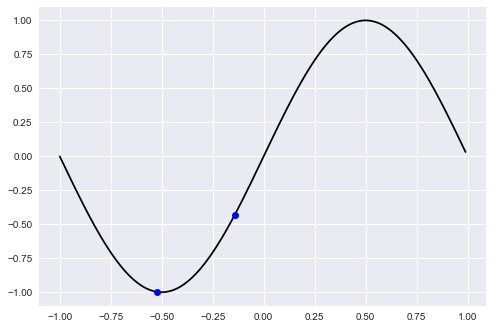

In [9]:
# Trực quan hóa hàm f và 2 điểm dữ liệu được phát sinh ở trên
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn")

xx = np.arange(-1, 1, 0.01).reshape(-1, 1)
yy = np.sin(np.pi * xx)
plt.plot(xx, yy, color="black")
plt.plot(X, Y, "o", color="blue")

---
**Code dùng cho câu 4,5,6:**

In [10]:
#Tìm a^ của g^ = a^.x
def get_a_list(N):
    a = []
    for i in range(N):
        X, Y = generate_dataset(2)
        # Tìm w (tương tự a)
        X_dagger = np.dot(np.linalg.inv(np.dot(X.T, X)), X.T)
        w = np.dot(X_dagger, Y)
        a.append(w)
    return a

In [11]:
# g_mean = a_mean*x
# a_list và a_hat dùng chung cho câu 5 và 6.
a_list = get_a_list(10000)
a_hat = np.mean(a_list)
print("g^ = ", np.round(a_hat, 2), "x")

g^ =  1.42 x


YOUR ANSWER HERE Giá trị của a^ xoay quanh 1.4, không khớp với các đáp án mà đề cho. Do đó, em chọn đáp án [e]

## Câu 5 (1 điểm)


Theo công thức lý thuyết đã học:
$$bias = \mathbb{E}_\mathbf{x}\left[(\bar{g}(\mathbf{x}) - f(\mathbf{x}))^2\right]$$

In [12]:
X, Y = generate_dataset(10000)
bias = np.mean((a_hat * X - Y)**2)
print("bias =", np.round(bias, 2))

bias = 0.27


YOUR ANSWER HERE Giá trị của bias xoay quanh 0.27. Do đó, em chọn đáp án [b]

## Câu 6 (1 điểm)

$$var =  \mathbb{E}_\mathbf{x}\left[\mathbb{E}_\mathcal{D}\left[(g^{(\mathcal{D})}(\mathbf{x}) - \bar{g}(\mathbf{x}))^2\right]\right]$$

In [13]:
# variance = np.mean((np.outer(a_list, X) - a_hat * X)**2)
variance = np.mean((X*a_list - a_hat * X)**2)
print("variance =", np.round(variance, 2))

variance = 0.24


YOUR ANSWER HERE Giá trị của variance xoay quanh 0.24. Do đó, em chọn đáp án [a]

## Câu 7 (1 điểm)


$$\mathbb{E}_\mathbf{D}\left[\mathbb{E}_\mathcal{out}(g^{(\mathcal{D})})\right] = bias + variance$$

---
- Tại $H(x) = b$

In [14]:
def get_b_list(N=10000):
    b = []
    for i in range(N):
        X, Y = generate_dataset(2)
        b.append(np.mean(Y))
    return b

In [15]:
b_list = get_b_list()
b_hat = np.mean(b_list)
bias = np.mean((b_hat - Y)**2)
variance = np.mean((b_list - b_hat)**2)
print("Eout = bias + varinace = {} + {} = {}".format(np.round(bias, 2),
                                                   np.round(variance, 2),
                                                   np.round(bias + variance, 2))) 

Eout = bias + varinace = 0.49 + 0.26 = 0.75


---
- Tại $H(x) = ax$

Dạng này tương tự câu 4,5 và 6. Do đó ta có kết quả: 

In [16]:
a_list = get_a_list(10000)
a_hat = np.mean(a_list)
bias = np.mean((a_hat * X - Y)**2)
variance = np.mean((X*a_list - a_hat * X)**2)
print("Eout = bias + varinace = {} + {} = {}".format(np.round(bias, 2),
                                                   np.round(variance, 2),
                                                   np.round(bias + variance, 2))) 

Eout = bias + varinace = 0.28 + 0.24 = 0.52


---
- Tại $H(x) = ax + b$

In [17]:
def get_a_b_list(N=10000):
    a_list = []
    b_list = []
    for i in range(N):
        X, Y = generate_dataset(2)
        a = (Y[1]-Y[0])/(X[1]- X[0])
        b = Y[1] - a*X[1]
        a_list.append(a)
        b_list.append(b)
    return a_list, b_list

In [18]:
a_list, b_list = get_a_b_list()
a_hat = np.mean(a_list)
b_hat = np.mean(b_list)
bias = np.mean((a_hat*X + b_hat - Y)**2)
variance = np.mean((a_list*X + b_list - a_hat*X  - b_hat)**2)
print("Eout = bias + varinace = {} + {} = {}".format(np.round(bias, 2),
                                                   np.round(variance, 2),
                                                   np.round(bias + variance, 2))) 

Eout = bias + varinace = 0.2 + 1.68 = 1.89


---
- Tại $H(x) = ax^2$

In [19]:


#Tìm a^ của g^ = (a^)x^2
def get_a_list2(N):
    a = []
    a_value = 0
    for _ in range(N):
        # two random points
        X,Y = generate_dataset(2)
        a_value = (X[0]**2 * Y[0] + X[1]**2 * Y[1]) / (X[0]**4 + X[1]**4)
        a.append(a_value)
    return a

In [20]:
a_list = get_a_list2(100000)
a_hat = np.mean(a_list)
X, Y = generate_dataset(100000)
bias = np.mean((a_hat*(X**2) - Y)**2)
variance = np.mean((a_list * X**2 - (a_hat * X**2))**2)
print("Eout = bias + varinace = {} + {} = {}".format(np.round(bias, 2),
                                                   np.round(variance, 2),
                                                   np.round(bias + variance, 2))) 

Eout = bias + varinace = 0.5 + 19.08 = 19.58


---
- Tại $H(x) = ax^2 + b$

In [21]:
#Tìm a^ của g^ = (a^)x^2 + b^
def get_a_b_list2(N):
    a = []
    a_value = 0
    b = []
    b_value = 0
    for _ in range(N):
       # two random points
        X,Y = generate_dataset(2)
       
        i = (X[0]**2 + X[1]**2)
        j = (Y[0] + Y[1])
        k = (X[0]**4 + X[1]**4)
        m = (X[0]**2 * Y[0] + X[1]**2 * Y[1])

        a_value = (2 * m - i * j) / (2 * k - i ** 2)
        b_value = (j * k - i * m) / (2 * k - i ** 2)
        a.append(a_value)
        b.append(b_value)
    return a,b

In [22]:
a_list, b_list  = get_a_b_list2(10000)
a_hat = np.mean(a_list)
b_hat = np.mean(b_list)
X, Y = generate_dataset(10000)
bias = np.mean((a_hat*(X**2) + b_hat - Y)**2)
variance = np.mean((a_list * X**2 + b_list - (a_hat * X**2 + b_hat))**2)
print("Eout = bias + varinace = {} + {} = {}".format(np.round(bias, 2),
                                                   np.round(variance, 2),
                                                   np.round(bias + variance, 2))) 

Eout = bias + varinace = 3.62 + 9790.06 = 9793.68


YOUR ANSWER HERE Ta thấy kết quả tại H(x) = ax bằng 0.5 là nhỏ nhất. Do đó, em chọn đáp án [b]

## Câu 8 (1 điểm)

Theo đề bài:
- $m_\mathcal{H}(1)=2$.
- $m_\mathcal{H}(N+1) = 2m_\mathcal{H}(N) - \binom{N}{q}$ với $q$ là một số nguyên cố định $\ge1$. Để dễ nhìn hơn, ta có thể viết lại công thức này như sau: $m_\mathcal{H}(N) = 2m_\mathcal{H}(N-1) - \binom{N-1}{q}$.

Bây giờ, thử tăng $N$ dần lên ($N = 1, 2, 3, ...$). Khi nào thì $m_\mathcal{H}(N)$ sẽ bị break?

Với $N = d$ là break point thì  $m_\mathcal{H}(d)=2^d$. Khi đó phương trình trên trở thành:

- $2^d = 2.2^{d-1} - \binom{d-1}{q}$ <=> $\binom{d-1}{q} = 0$ <=> $d<q+1$

hay:

- $d\le q$

In [23]:
def N_choose_k(N, k):
    if k > N: return 0
    return math.factorial(N) // (math.factorial(k) * math.factorial(N-k))

def m_H(N, q):
    if N == 1:
        return 2 
    return 2 * m_H(N-1, q) - N_choose_k(N-1, q)


def get_N(Nmax,q): #Nmax: giá trị giới hạn, chạy từ 1->Nmax
    d_vc = -1
    for N in range(1,Nmax):
        shattered = (m_H(N, q) == 2**N)
        if shattered:
            d_vc = N
        print("q = {}   N = {}   m_H = {}  2^N = {} shattered? {}".format(q,N,m_H(N, q),2**N,shattered))

    print("\nResult: VC dimension d_vc = {}, q = {}".format(d_vc,q))

get_N(10,2)
get_N(10,3)
get_N(10,4)
get_N(10,5)

q = 2   N = 1   m_H = 2  2^N = 2 shattered? True
q = 2   N = 2   m_H = 4  2^N = 4 shattered? True
q = 2   N = 3   m_H = 7  2^N = 8 shattered? False
q = 2   N = 4   m_H = 11  2^N = 16 shattered? False
q = 2   N = 5   m_H = 16  2^N = 32 shattered? False
q = 2   N = 6   m_H = 22  2^N = 64 shattered? False
q = 2   N = 7   m_H = 29  2^N = 128 shattered? False
q = 2   N = 8   m_H = 37  2^N = 256 shattered? False
q = 2   N = 9   m_H = 46  2^N = 512 shattered? False

Result: VC dimension d_vc = 2, q = 2
q = 3   N = 1   m_H = 2  2^N = 2 shattered? True
q = 3   N = 2   m_H = 4  2^N = 4 shattered? True
q = 3   N = 3   m_H = 8  2^N = 8 shattered? True
q = 3   N = 4   m_H = 15  2^N = 16 shattered? False
q = 3   N = 5   m_H = 26  2^N = 32 shattered? False
q = 3   N = 6   m_H = 42  2^N = 64 shattered? False
q = 3   N = 7   m_H = 64  2^N = 128 shattered? False
q = 3   N = 8   m_H = 93  2^N = 256 shattered? False
q = 3   N = 9   m_H = 130  2^N = 512 shattered? False

Result: VC dimension d_vc = 3, q = 

YOUR ANSWER HERE Ta thấy các kết quả thử đều cho ra d_vc = q. Do đó, em chọn đáp án [c]

## Câu 9 (1 điểm)

$\bigcap_{k=1}^{K} H_k$ là tập giả thuyết nhỏ nhất trong các tập $H$ đang xét vì là phép giao. Nên nó có thể bị phá vỡ bỡi bất cứ $d_{vc}$ của tập $H_i$ nào.

Do đó: 
- $d_{vc}(\bigcap_{k=1}^{K} H_k) \leq d_{vc}(H_i)$   (với $1\leq i \leq K$)
 
Hay: 
- $d_{vc}(\bigcap_{k=1}^{K} H_k) \leq min\{d_{vc}(H_i)\}$ 

Ở trường hợp xấu nhất, có thể tồn tại 2 tập $H$ không trùng nhau hay $H_1 \cap H_2 = \theta => d_{vc}(\bigcap_{k=1}^{K} H_k) = 0$. 

**Vậy**: 
- $0 \leq d_{vc}(\bigcap_{k=1}^{K} H_k) \leq min\{d_{vc}(H_i)\}$


YOUR ANSWER HERE Do đó, em chọn đáp án [b]

## Câu 10 (1 điểm)

**Chặn dưới:**

Vì chúng ta hợp các giả thuyết lại với nhau, nên tập hợp các bộ giả thuyết phải có $d_{vc}$ lớn nhất bằng $d_{vc}$ lớn nhất trong số các bộ. Ít nhất, chúng ta bảo toàn khả năng phá vỡ một tập hợp các điểm lớn bằng tập hợp các điểm lớn nhất có thể bị phá vỡ bởi một trong những giả thuyết ban đầu được đặt riêng lẻ. 

Do đó: 
- $max\{ d_{vc}(H_k)\}_{k=1}^{K} \leq d_{vc}(\bigcup_{k=1}^{K} H_k)$

**Chặn trên:**
- (phần này em không biết chứng minh ạ!)

YOUR ANSWER HERE Do đó, em chọn đáp án [e]